Ex.2 b) + c)

(b) 94% HDI: [15.5878, 20.6396]
(c) mode: 18.0000


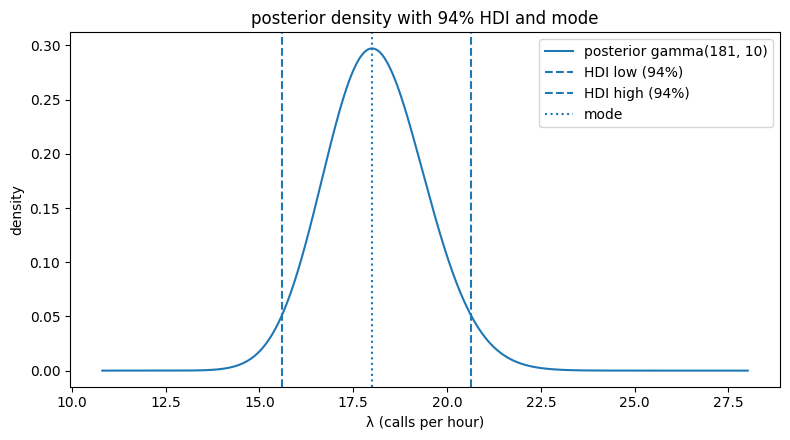

In [8]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

alpha, beta = 181.0, 10.0
dist = gamma(a=alpha, scale=1.0 / beta)

mode = (alpha - 1) / beta

xs = np.linspace(dist.ppf(1e-10), dist.ppf(1 - 1e-10), 150_000)
cdf = dist.cdf(xs)
pdf = dist.pdf(xs)

mass = 0.94
starts = np.where(cdf <= 1 - mass)[0]
ends = np.searchsorted(cdf, cdf[starts] + mass, side='left')
widths = xs[ends] - xs[starts]
i = widths.argmin()
hdi_low, hdi_high = xs[starts[i]], xs[ends[i]]

print(f"(b) 94% HDI: [{hdi_low:.4f}, {hdi_high:.4f}]")
print(f"(c) mode: {mode:.4f}")

plt.figure(figsize=(8, 4.5))
plt.plot(xs, pdf, label="posterior gamma(181, 10)")
plt.axvline(hdi_low, linestyle="--", label="HDI low (94%)")
plt.axvline(hdi_high, linestyle="--", label="HDI high (94%)")
plt.axvline(mode, linestyle=":", label="mode")

plt.title("posterior density with 94% HDI and mode")
plt.xlabel("λ (calls per hour)")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()
